In [25]:
import pickle
import pandas as pd
import json
import seaborn as sns
df = pd.read_csv('../data/alkon-hinnasto-tekstitiedostona.csv')
beerdf = df[df['Tyyppi'] == 'oluet']
labeled = beerdf.sort_values('Alkoholi-%')

In [33]:
def classify(row):
    i = 2.8
    ii = 3.7
    iii = 4.7
    iva = 5.8

    if row['Alkoholi-%'] > iva:
        return 'IVB'
    if row['Alkoholi-%'] > iii:
        return 'IVA'
    if row['Alkoholi-%'] > ii:
        return 'III'
    if row['Alkoholi-%'] > i:
        return 'II'
    if row['Alkoholi-%'] >= 0:
        return 'I'
    else:
        return 'Error'

labeled['taxclass'] = labeled.apply(lambda row: classify(row), axis = 1)
labeled.head()

,Numero,Nimi,Valmistaja,Pullokoko,Hinta,Litrahinta,Uutuus,Hinnastojärjestyskoodi,Tyyppi,Alatyyppi,...,Alkoholi-%,Hapot g/l,Sokeri g/l,Kantavierrep-%,Väri EBC,Katkerot EBU,Energia kcal/100 ml,Valikoima,EAN,taxclass
6437,735484,The Original Small Beer Dark Lager,Small Beer Brew,"0,35 l",4.22,11.77,NaN,600,oluet,Tumma lager,...,1.0,NaN,NaN,1.0,NaN,20.0,NaN,tilausvalikoima,5060552040010,I
7128,743404,Mustan Virran St. Olaf Pale Ale 1.2%,Mustan Virran Panimo,"0,33 l",2.68,7.82,NaN,600,oluet,NaN,...,1.2,NaN,NaN,3.4,NaN,30.0,10.0,vakiovalikoima,6430062340686,I
6755,707486,Aecht Schlenkerla Rauchbier Hansla,Heller-Bräu Trum,"0,5 l",3.09,5.98,NaN,600,oluet,Erikoisuus,...,1.2,NaN,NaN,3.4,NaN,27.0,10.0,erikoiserä,4037458000180,I
6438,921525,The Original Small Beer Lager,Small Beer Brew Co.,"0,35 l",4.39,12.26,NaN,600,oluet,Lager,...,2.1,NaN,NaN,7.1,NaN,19.0,30.0,tilausvalikoima,5060552040003,I
7286,950736,Rohozec Pomelo Citrus Maxima,Pivovar Rohozec,"0,5 l",3.29,6.38,NaN,600,oluet,Erikoisuus,...,2.2,NaN,NaN,8.5,NaN,16.0,30.0,tilausvalikoima,8594011530721,I


In [58]:
#Cluster data by taxclasses
tc = labeled.groupby(['taxclass']).agg(products = ('Numero', 'count'),
    avg_price = ('Hinta', 'mean'),
    ppl = ('Litrahinta', 'mean'),
    alcohol = ('Alkoholi-%', 'mean')
).sort_values(by='taxclass')
tc

,products,avg_price,ppl,alcohol
taxclass,,,,
I,11,3.357273,8.738182,2.100000
II,7,3.907143,11.225714,3.514286
III,74,6.803649,8.620541,4.408108
IVA,317,5.635016,10.617981,5.268454
IVB,747,8.218768,18.637082,8.152209


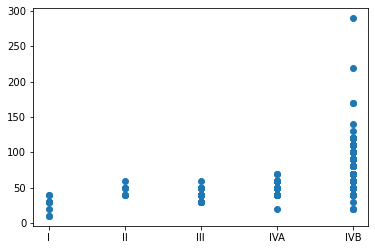

In [47]:
import matplotlib.pyplot as plt

plt.scatter(labeled['taxclass'], labeled['Energia kcal/100 ml'])
plt.show()

In [56]:
df_brewery = labeled.groupby(['Valmistaja', 'taxclass']).agg(
    products = ('Numero', 'count'),
    avg_price = ('Hinta', 'mean'),
    ppl = ('Litrahinta', 'mean'),
    alcohole = ('Alkoholi-%', 'mean')
).sort_values(by='Valmistaja')
df_brewery.sample(10)

,,products,avg_price,ppl,alcohole
Valmistaja,taxclass,,,,
V1 Brewery,IVA,1,3.710000,10.940000,5.200000
Tucher,IVA,1,3.520000,6.840000,5.000000
Samuel Smith Brewery,IVA,3,5.373333,12.963333,5.000000
Seven Island Brewery,IVB,6,11.120000,25.270000,10.166667
Jopen Brewery,IVB,4,6.565000,19.892500,7.750000
Saku Õlletehas,IVA,1,2.890000,5.580000,5.200000
Lindemans Brouwerij,IVB,3,18.273333,27.736667,6.000000
Open Water Brewery,IVB,5,5.674000,17.194000,7.200000
Marston's Brewery,IVA,1,4.490000,8.780000,5.700000
